[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Workshop-2024/blob/main/Day%206%3A%20Supervised%20Learning/Part3_Building_Decision_Tree_Classifier.ipynb)


# Building a Simple Decision Tree Classifier

In this notebook, we will build a Decision Tree classifier using a very simple and easy-to-understand dataset: the **Play Tennis Dataset**.

### **Play Tennis Dataset**
This dataset contains information about whether people play tennis depending on weather conditions. The dataset has the following features:
- **Outlook** (Sunny, Overcast, Rainy)
- **Temperature** (Hot, Mild, Cool)
- **Humidity** (High, Normal)
- **Wind** (Weak, Strong)

The target variable is whether they **Play Tennis** (`Yes` or `No`).

---

### **Step 1: Import the Required Libraries**

We will first import the necessary libraries to handle data and build the decision tree model.

In [2]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

### **Step 2: Create the Play Tennis Dataset**

Now let's create the dataset manually in Python. We will use a small dataset with 14 samples.

In [6]:
# Creating the Play Tennis Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


### **Step 3: Preprocessing the Data**

We need to convert the categorical variables (Outlook, Temperature, Humidity, Wind) into numeric values that can be used by the Decision Tree algorithm. We'll use `pandas.get_dummies()` for one-hot encoding.

In [7]:
# Convert categorical features into numeric using one-hot encoding
df_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))
df_encoded['PlayTennis'] = df['PlayTennis'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target variable to 1 (Yes) and 0 (No)

# Show the processed data
df_encoded.head()

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,PlayTennis
0,False,False,True,False,True,False,True,False,False,True,0
1,False,False,True,False,True,False,True,False,True,False,0
2,True,False,False,False,True,False,True,False,False,True,1
3,False,True,False,False,False,True,True,False,False,True,1
4,False,True,False,True,False,False,False,True,False,True,1


### **Step 4: Split the Dataset**

We'll split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [9]:
# Splitting the dataset into training and testing sets
X = df_encoded.drop('PlayTennis', axis=1)  # Features
y = df_encoded['PlayTennis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the training data
X_train

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
12,True,False,False,False,True,False,False,True,False,True
5,False,True,False,True,False,False,False,True,True,False
8,False,False,True,True,False,False,False,True,False,True
2,True,False,False,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
13,False,True,False,False,False,True,True,False,True,False
4,False,True,False,True,False,False,False,True,False,True
7,False,False,True,False,False,True,True,False,False,True
10,False,False,True,False,False,True,False,True,True,False
3,False,True,False,False,False,True,True,False,False,True


### **Step 5: Build the Decision Tree Classifier**

Now we'll create and train the decision tree classifier using Scikit-learn's `DecisionTreeClassifier` class.

In [10]:
# Create the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

### **Step 6: Visualize the Decision Tree**

We will now visualize the trained decision tree to understand how it makes decisions.

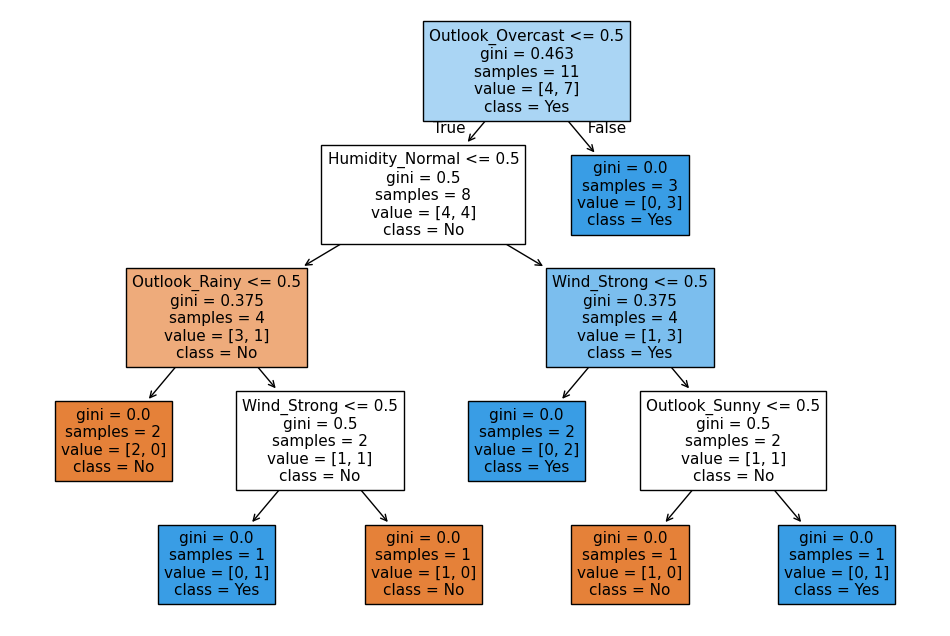

In [12]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

### **Step 7: Evaluate the Model**

Finally, we'll evaluate the model's performance using accuracy. We can also inspect the test set predictions.

In [13]:
# Calculate the accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Show the actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

Model Accuracy: 100.00%


,Actual,Predicted
9,1,1
11,1,1
0,0,0


### **Step 8: Confusion Matrix**

We will now create a confusion matrix to evaluate the classification performance of our Decision Tree. A confusion matrix shows the true positives, true negatives, false positives, and false negatives of the predictions.

In [16]:
# Import the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1 0]
 [0 2]]


### **Step 9: Visualize the Confusion Matrix**

Let's visualize the confusion matrix using a heatmap to make it easier to interpret.

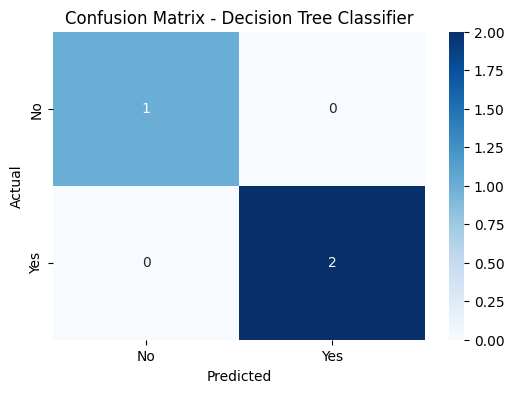

In [15]:
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

### **Step 10: Classification Report**

Finally, we will print out the classification report, which provides precision, recall, and F1-score for each class.

In [17]:
# Display the classification report
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



---
### Summary: Building a Decision Tree Classifier

In this notebook, we built a **Decision Tree classifier** using the **Play Tennis** dataset to predict whether people would play tennis based on weather conditions.

---

### Steps:

1. **Dataset Creation**: 
   - Features: **Outlook**, **Temperature**, **Humidity**, and **Wind**.
   - Target: **Play Tennis** (`Yes` or `No`).

2. **Preprocessing**:
   - Categorical features were one-hot encoded, and the target variable was converted into binary (`1` for "Yes" and `0` for "No").

3. **Data Splitting**:
   - The data was split into 80% training and 20% testing sets.

4. **Model Training**:
   - A **DecisionTreeClassifier** was trained on the training set to learn patterns in the data.

5. **Visualization**:
   - The decision tree was visualized to show how decisions were made based on features.

6. **Model Evaluation**:
   - **Accuracy** was calculated, and a **confusion matrix** was used to examine correct/incorrect predictions.
   - A **classification report** provided precision, recall, and F1-score for each class.

---

### Key Takeaways:

- **Decision Trees** are intuitive, easy to visualize, and interpret.
- **Preprocessing** of categorical data is necessary.
- **Model Evaluation**: Accuracy, confusion matrix, and classification reports provide insight into the model’s performance.

This notebook demonstrated how to build and evaluate a Decision Tree model, making it a useful tool for beginners to understand machine learning.

---
---